In [1]:
import os
import numpy as np
import time

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

import pandas as pd
import seaborn as sns

import csv

%matplotlib inline 

In [2]:
from sklearn.cluster import KMeans
import cv2

In [3]:
# base directory
base_dir = "/home/dmsai2/Desktop/DCC2022/data"
processed_dir = "/home/dmsai2/Desktop/DCC2022/pdata"
sub_data_dir = "/home/dmsai2/Desktop/DCC2022/tdata"

In [4]:
# load class list from directory
cls_list = os.listdir(base_dir)
print(*cls_list)

L2_21 L2_24 L2_15 L2_27 L2_30 L2_50 L2_40 L2_39 L2_20 L2_45 L2_3 L2_12 L2_41 L2_10 L2_34 L2_52 L2_33 L2_46 L2_44 L2_25


In [5]:
numdata = 0
numclass = 0
data_list = {}

for cls in cls_list:
    imlist = os.listdir(base_dir + "/" + cls)
    print(cls, end=' : ')
    print(len(imlist))
    numdata = numdata + len(imlist)
    data_list[cls] = imlist
    print("-"*12)

numclass = len(cls_list)

print("num of class :", numclass)
print("num of data :", numdata)

L2_21 : 410
------------
L2_24 : 782
------------
L2_15 : 1509
------------
L2_27 : 426
------------
L2_30 : 364
------------
L2_50 : 781
------------
L2_40 : 180
------------
L2_39 : 454
------------
L2_20 : 410
------------
L2_45 : 631
------------
L2_3 : 595
------------
L2_12 : 518
------------
L2_41 : 593
------------
L2_10 : 1893
------------
L2_34 : 419
------------
L2_52 : 382
------------
L2_33 : 6206
------------
L2_46 : 2214
------------
L2_44 : 547
------------
L2_25 : 6189
------------
num of class : 20
num of data : 25503


In [6]:
numsubcls = 0
subcls_list = {}

for cls in cls_list:
    sub_list = os.listdir(sub_data_dir + "/" + cls)
    subcls_list[cls] = sub_list
    
numsubcls = len(subcls_list)
print("num of subclass :", numsubcls)

num of subclass : 20


In [7]:
data = []
cnt = 0

if os.path.isfile('processed_df.csv'):
    print("reading data from csv.")
    df = pd.read_csv('processed_df.csv', index_col=0)
    df = df.astype({'img':'string', 
                    'label':'string', 
                    'ftype':'string', 
                    'cmap':'string', 
                    'fsize':'float', 
                    'fmtime':'datetime64[ns]', 
                    'width':'int', 
                    'height':'int', 
                    'channel':'int', 
                    'subclass':'string', 
                    'mode_rate':'float', 
                    'numcluster':'int',
                    'avgcolor':'string',
                    'modecolors':'string',
                    'modehists':'string'})
    
    # df['avgcolor'] = '' # 평균 색
    # df['modecolors'] = '' # 최빈값 색들 (정렬 상위 4개)
    # df['modehists'] = '' # 최빈값 색 각 비율 (정렬 4개)
    display(df.head())
    
else:
    print("generating data")
    for label in data_list.keys():
        for subcls in subcls_list[label]:
            subcls_path = f"{sub_data_dir}/{label}/{subcls}"
            imglist = os.listdir(subcls_path)

            for img_dir in imglist:
                img_path = f"{subcls_path}/{img_dir}"
                img = Image.open(img_path)
                imgarr = np.array(img)
                if len(imgarr.shape) == 2:
                    w, h = imgarr.shape
                    c = 1
                else:
                    w, h, c = imgarr.shape
                fsize = (os.path.getsize(img_path) / 1024.)
                fmtime = time.ctime(os.path.getmtime(img_path))
                data.append([img_dir[:-4], label, img_dir[-3:], img.mode, fsize, fmtime, w, h, c, subcls])
                cnt += 1
                print(f"{(int((cnt / numdata) * 100000.) / 1000.)}% - {cnt}/{numdata}")
    
    df = pd.DataFrame(data, columns=['img','label','ftype', 'cmap', 'fsize', 'fmtime', 'width', 'height', 'channel', 'subclass', 'mode_rate', 'numcluster', 'avgcolor', 'modecolors', 'modehists'])
    df = df.astype({
        'img':'string', 
        'label':'string', 
        'ftype':'string', 
        'cmap':'string', 
        'fsize':'float', 
        'fmtime':'datetime64[ns]', 
        'width':'int', 
        'height':'int', 
        'channel':'int', 
        'subclass':'string', 
        'mode_rate':'float',
        'numcluster':'int',
        'avgcolor':'string',
        'modecolors':'string',
        'modehists':'string'})
    display(df.head())

reading data from csv.


,img,label,ftype,cmap,fsize,fmtime,width,height,channel,subclass,mode_rate,numcluster,avgcolor,modecolors,modehists
0,qfknrhrrdikepslumadh,L2_21,jpg,RGB,24.222656,2021-12-17 17:53:18,300,300,3,plug,60.332500,50,<NA>,<NA>,<NA>
1,ixxhosetjwabxnntumca,L2_21,jpg,RGB,55.888672,2021-12-17 17:53:24,1200,1200,3,plug,89.512500,50,<NA>,<NA>,<NA>
2,vyaroxjwnkljwbhkzphd,L2_21,jpg,RGB,129.636719,2021-12-17 17:53:22,700,700,3,plug,73.785000,50,<NA>,<NA>,<NA>
3,jiicqwbbzhvvjxhozaji,L2_21,jpg,RGB,375.979492,2021-12-17 17:53:06,2480,3508,3,plug,76.732270,50,<NA>,<NA>,<NA>
4,kfxkkclkrczktrfddomu,L2_21,jpg,RGB,115.896484,2021-12-17 17:53:24,3508,2480,3,plug,96.462766,50,<NA>,<NA>,<NA>


In [8]:
print(df.head())

                    img  label ftype cmap       fsize              fmtime  \
0  qfknrhrrdikepslumadh  L2_21   jpg  RGB   24.222656 2021-12-17 17:53:18   
1  ixxhosetjwabxnntumca  L2_21   jpg  RGB   55.888672 2021-12-17 17:53:24   
2  vyaroxjwnkljwbhkzphd  L2_21   jpg  RGB  129.636719 2021-12-17 17:53:22   
3  jiicqwbbzhvvjxhozaji  L2_21   jpg  RGB  375.979492 2021-12-17 17:53:06   
4  kfxkkclkrczktrfddomu  L2_21   jpg  RGB  115.896484 2021-12-17 17:53:24   

   width  height  channel subclass  mode_rate  numcluster avgcolor modecolors  \
0    300     300        3     plug  60.332500          50     <NA>       <NA>   
1   1200    1200        3     plug  89.512500          50     <NA>       <NA>   
2    700     700        3     plug  73.785000          50     <NA>       <NA>   
3   2480    3508        3     plug  76.732270          50     <NA>       <NA>   
4   3508    2480        3     plug  96.462766          50     <NA>       <NA>   

  modehists  
0      <NA>  
1      <NA>  
2      <

In [9]:
df = df.astype({
    'img':'string', 
    'label':'string', 
    'ftype':'string', 
    'cmap':'string', 
    'fsize':'float', 
    'fmtime':'datetime64[ns]', 
    'width':'int', 
    'height':'int', 
    'channel':'int', 
    'subclass':'string', 
    'mode_rate':'float',
    'numcluster':'int', 
    'avgcolor':'string',
    'modecolors':'string',
    'modehists':'string'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25503 entries, 0 to 25502
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   img         25503 non-null  string        
 1   label       25503 non-null  string        
 2   ftype       25503 non-null  string        
 3   cmap        25503 non-null  string        
 4   fsize       25503 non-null  float64       
 5   fmtime      25503 non-null  datetime64[ns]
 6   width       25503 non-null  int64         
 7   height      25503 non-null  int64         
 8   channel     25503 non-null  int64         
 9   subclass    25503 non-null  string        
 10  mode_rate   25503 non-null  float64       
 11  numcluster  25503 non-null  int64         
 12  avgcolor    16 non-null     string        
 13  modecolors  16 non-null     string        
 14  modehists   16 non-null     string        
dtypes: datetime64[ns](1), float64(2), int64(4), string(8)
memory usage: 3.

In [11]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist

def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

def analyzeimg(img_dir : str, isprint=False):
    img = Image.open(img_dir)
    img = img.convert('RGB')
    plt.imshow(img)
    img = np.array(img)
    w, h, c = img.shape

    rate = min(w, h) / 200.
    rw, rh = int(w / rate), int(h / rate)
    
    img = cv2.resize(img, dsize=(rw, rh))
    
    w, h, c = img.shape
    
    img = img.reshape((w * h, 3))
    
    # if isprint: plt.imshow(img)
    
    k = 50
    clt = KMeans(n_clusters=k)
    clt.fit(img)
    
    hist = centroid_histogram(clt)
    
    #if isprint:
    #    for i, center in enumerate(clt.cluster_centers_):
    #        print(f"{i}, {center} : {hist[i]}%")
    
    if isprint: print("each % :", hist)
    
    bar = plot_colors(hist, clt.cluster_centers_)

    if isprint:
        # show our color bart
        plt.figure()
        # plt.axis("off")
        plt.imshow(bar)
        plt.show()
    
    print(len(hist))
    print(hist)
    
    avg = sum([clt.cluster_centers_[i] * hist[i] for i in range(len(hist))])
    mode = clt.cluster_centers_[list(hist).index(max(hist))]
    if isprint: print(f"average : {avg}\nmode : {mode} {int(hist[list(hist).index(max(hist))]*100)}%")
    
    # average, mode, clusters(RGB), hist(each rate), rate of mode color
    return avg, mode, clt.cluster_centers_, hist, hist[list(hist).index(max(hist))]*100

each % : [0.01263158 0.01238722 0.4593797  0.10808271 0.00674812 0.00785714
 0.00680451 0.00887218 0.02400376 0.00659774 0.0025188  0.00240602
 0.00693609 0.00851504 0.00176692 0.00304511 0.03593985 0.0056015
 0.00736842 0.00146617 0.01058271 0.00409774 0.00680451 0.0050188
 0.01020677 0.01359023 0.00464286 0.00577068 0.00364662 0.01556391
 0.01007519 0.02676692 0.0025     0.00573308 0.01009398 0.00652256
 0.0131015  0.00265038 0.0068985  0.0056015  0.00808271 0.00137218
 0.00157895 0.00620301 0.00665414 0.00140977 0.0143985  0.05163534
 0.00161654 0.00825188]


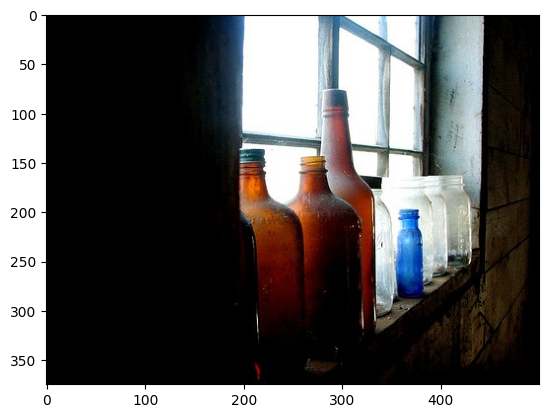

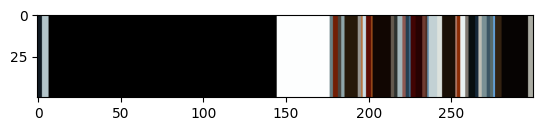

50
[0.01263158 0.01238722 0.4593797  0.10808271 0.00674812 0.00785714
 0.00680451 0.00887218 0.02400376 0.00659774 0.0025188  0.00240602
 0.00693609 0.00851504 0.00176692 0.00304511 0.03593985 0.0056015
 0.00736842 0.00146617 0.01058271 0.00409774 0.00680451 0.0050188
 0.01020677 0.01359023 0.00464286 0.00577068 0.00364662 0.01556391
 0.01007519 0.02676692 0.0025     0.00573308 0.01009398 0.00652256
 0.0131015  0.00265038 0.0068985  0.0056015  0.00808271 0.00137218
 0.00157895 0.00620301 0.00665414 0.00140977 0.0143985  0.05163534
 0.00161654 0.00825188]
average : [62.67957189 60.01921654 59.32207538]
mode : [0.20377266 0.12312288 0.15123368] 45%
mode_rate : 45.93796992481203
numclusters : 50
avgcolor : 62.679571888825365,60.01921654237081,59.32207537825183
topclusters : 0.20377265845309012,0.12312287736487804,0.15123368386459646/253.9507826086921,254.40939130434344,254.0885217391289/6.684651841049877,3.0200510390084787,2.160772876412672/17.348788198103215,6.299789251844139,2.657534246

In [53]:
avg, mode, clusters, hist, mode_rate = analyzeimg(base_dir + "/L2_24/pxtepvqayepbyjnrzoqa.jpg", True)

print("mode_rate :", mode_rate)
print("numclusters :", len(clusters))

temp = [(clusters[i], hist[i]) for i in range(len(hist))]
temp.sort(key=lambda x:-x[1])

topclusters = [i[0] for i in temp[:4]]
tophists = [i[1] for i in temp[:4]]

topclusters = '/'.join([','.join(list(map(str, i))) for i in topclusters])
tophists = '/'.join(list(map(str, tophists)))

print("avgcolor :", ','.join(list(map(str, avg))))
print("topclusters :", topclusters)
print("tophists :", tophists)

each % : [0.022475 0.00535  0.098675 0.002    0.00295  0.01775  0.01315  0.024925
 0.1875   0.01095  0.0038   0.019875 0.010175 0.020175 0.034025 0.010375
 0.002325 0.002    0.0047   0.012175 0.0302   0.005175 0.0499   0.001975
 0.004325 0.017875 0.02695  0.0179   0.020425 0.0019   0.0584   0.002225
 0.012375 0.01135  0.003475 0.001375 0.0131   0.005425 0.01145  0.0013
 0.074175 0.053575 0.036775 0.022925 0.002125 0.000925 0.001025 0.0014
 0.00105  0.003575]


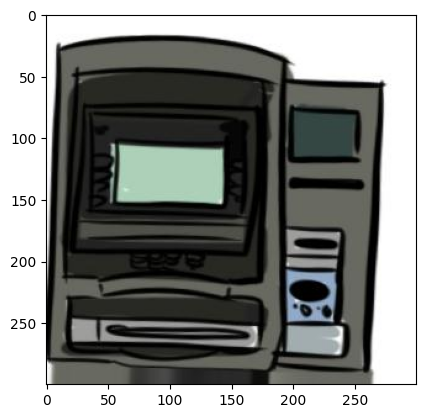

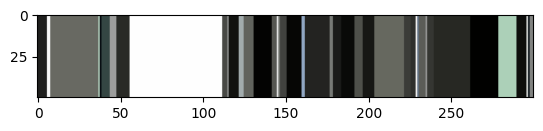

50
[0.022475 0.00535  0.098675 0.002    0.00295  0.01775  0.01315  0.024925
 0.1875   0.01095  0.0038   0.019875 0.010175 0.020175 0.034025 0.010375
 0.002325 0.002    0.0047   0.012175 0.0302   0.005175 0.0499   0.001975
 0.004325 0.017875 0.02695  0.0179   0.020425 0.0019   0.0584   0.002225
 0.012375 0.01135  0.003475 0.001375 0.0131   0.005425 0.01145  0.0013
 0.074175 0.053575 0.036775 0.022925 0.002125 0.000925 0.001025 0.0014
 0.00105  0.003575]
average : [101.40371467 104.07301722 100.51050157]
mode : [254.84853333 254.84933333 254.7628    ] 18%
mode_rate : 18.75
numclusters : 50
avgcolor : 101.4037146698795,104.07301721877691,100.51050156693998
topclusters : 254.84853333333106,254.84933333333555,254.76280000000156/104.26830504180391,105.36255383835825,98.25690397770461/39.653185035389384,40.542635658914335,35.097741826760654/102.89083904109589,104.41652397260275,95.35059931506851
tophists : 0.1875/0.098675/0.074175/0.0584


In [54]:
avg, mode, clusters, hist, mode_rate = analyzeimg(base_dir + "/L2_15/ftnfmkrklsfoyfyfelmb.jpg", True)

print("mode_rate :", mode_rate)
print("numclusters :", len(clusters))

temp = [(clusters[i], hist[i]) for i in range(len(hist))]
temp.sort(key=lambda x:-x[1])

topclusters = [i[0] for i in temp[:4]]
tophists = [i[1] for i in temp[:4]]

topclusters = '/'.join([','.join(list(map(str, i))) for i in topclusters])
tophists = '/'.join(list(map(str, tophists)))

print("avgcolor :", ','.join(list(map(str, avg))))
print("topclusters :", topclusters)
print("tophists :", tophists)

In [ ]:
# temp = [(clusters[i], hist[i]) for i in range(len(clusters))]
# temp.sort(key=lambda x:-x[1])

# topclusters = [i[0] for i in temp[:4]]
# tophists = [i[1] for i in temp[:4]]

# topclusters = '/'.join([','.join(list(map(str, i))) for i in topclusters])
# tophists = '/'.join(list(map(str, tophists)))

# print(topclusters)
# print(tophists)
# print()

# tmp1 = topclusters.split('/')
# tmp2 = [list(map(float, i.split(','))) for i in tmp1]
# print(tmp2)
# print()

# tmp3 = list(map(float, tophists.split('/')))
# print(tmp3)

# print(','.join(list(map(str, avg))))

In [24]:
df.describe()

,fsize,width,height,channel,mode_rate,numcluster
count,25503.000000,25503.000000,25503.000000,25503.000000,25503.000000,25503.0
mean,102.552891,1336.834216,1284.244089,3.044583,70.143273,50.0
std,123.861621,1166.400418,1069.300772,0.215317,21.946946,0.0
min,2.043945,97.000000,162.000000,1.000000,2.932367,50.0
25%,20.310059,375.000000,500.000000,3.000000,63.563750,50.0
50%,57.165039,700.000000,700.000000,3.000000,75.077500,50.0
75%,163.046387,2480.000000,2480.000000,3.000000,84.703750,50.0
max,3031.055664,5000.000000,5001.000000,4.000000,99.010000,50.0


In [26]:
df['numcluster'].describe()

count    25503.0
mean        50.0
std          0.0
min         50.0
25%         50.0
50%         50.0
75%         50.0
max         50.0
Name: numcluster, dtype: float64

In [ ]:
error_list = []

for i, row in df.iterrows():
    if float(df.loc[i, 'mode_rate']) != 0.0:
        continue
    print(f"{i}/{numdata} {i/numdata*100}%", row['label'], row['img'], end=' ')
    try:
        avg, mode, clusters, hist, mode_rate = analyzeimg(f"{base_dir}/{row['label']}/{row['img']}.{row['ftype']}", isprint=False)
        df.loc[i, 'mode_rate'] = mode_rate
        df.loc[i, 'numcluster'] = len(hist)
        
        temp = [(clusters[i], hist[i]) for i in range(len(clusters))]
        temp.sort(key=lambda x:-x[1])
        
        topclusters = [i[0] for i in temp[:4]]
        tophists = [i[1] for i in temp[:4]]
        
        topclusters = '/'.join([','.join(list(map(str, i))) for i in topclusters])
        tophists = '/'.join(list(map(str, tophists)))
        
        df.loc[i, 'avgcolor'] = ','.join(list(map(str, avg)))
        df.loc[i, 'modecolors'] = topclusters
        df.loc[i, 'modehists'] = tophists
        
        print("mode rate :", mode_rate)
    except Exception as e:
        print(e)
        error_list.append((row['label'], row['img']))
        df.loc[i, 'mode_rate'] = 0.0
        
    if i % 100 == 0:
        # df.to_csv('processed_df.csv', mode='w')
    
print("done with", str(len(error_list)), "errors.")
print(*error_list)

In [27]:
# df.to_csv('processed_df.csv', mode='w')

In [12]:
df['mode_rate'].value_counts()

76.9150    6
74.5225    6
84.2975    6
69.6250    6
65.4975    6
          ..
65.0600    1
45.4650    1
61.9225    1
56.7100    1
94.2550    1
Name: mode_rate, Length: 19010, dtype: int64

In [13]:
# make temp attribute
# illust 1, photo 0
df['isillust'] = 0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25503 entries, 0 to 25502
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   img         25503 non-null  string        
 1   label       25503 non-null  string        
 2   ftype       25503 non-null  string        
 3   cmap        25503 non-null  string        
 4   fsize       25503 non-null  float64       
 5   fmtime      25503 non-null  datetime64[ns]
 6   width       25503 non-null  int64         
 7   height      25503 non-null  int64         
 8   channel     25503 non-null  int64         
 9   subclass    25503 non-null  string        
 10  mode_rate   25503 non-null  float64       
 11  numcluster  25503 non-null  int64         
 12  avgcolor    16 non-null     string        
 13  modecolors  16 non-null     string        
 14  modehists   16 non-null     string        
 15  isillust    25503 non-null  int64         
dtypes: datetime64[ns](1), 

In [15]:
for i, row in df.iterrows():
    if df.loc[i, 'subclass'] == "etc":
        df.loc[i, 'isillust'] = 0
    else:
        df.loc[i, 'isillust'] = 1

In [16]:
df['isillust'].value_counts()

1    23578
0     1925
Name: isillust, dtype: int64

In [32]:
df['numpixel'] = 0

for i, row in df.iterrows():
    df.loc[i, 'numpixel'] = int(df.loc[i, 'height']) * int(df.loc[i, 'width'])

In [33]:
test = df['subclass'] == 'etc'
df1 = df[test]

test = df['subclass'] != 'etc'
df2 = df[test]

In [34]:
df1['mode_rate'].describe() # 실사

count    1925.000000
mean        7.947116
std         4.508251
min         2.932367
25%         5.337224
50%         6.669173
75%         8.868421
max        46.556391
Name: mode_rate, dtype: float64

In [35]:
df1.sort_values('mode_rate')

,img,label,ftype,cmap,fsize,fmtime,width,height,channel,subclass,mode_rate,numcluster,avgcolor,modecolors,modehists,isillust,numpixel
6862,erqhbfcoqtbdhdbzysek,L2_12,jpg,RGB,126.781250,2022-09-28 11:47:10,483,500,3,etc,2.932367,50,<NA>,<NA>,<NA>,0,241500
7389,bgvopfgoexfjgfykewbp,L2_41,jpg,RGB,127.203125,2022-09-28 11:47:10,376,500,3,etc,3.239623,50,<NA>,<NA>,<NA>,0,188000
6704,wuonwgmtchcacwjibbem,L2_12,jpg,RGB,97.480469,2022-09-28 11:47:20,375,500,3,etc,3.330827,50,<NA>,<NA>,<NA>,0,187500
6768,rjpopxbabtxgimnnpciz,L2_12,jpg,RGB,113.285156,2022-09-28 11:47:04,375,500,3,etc,3.475564,50,<NA>,<NA>,<NA>,0,187500
6921,yvqnrneixcpfrritfxjr,L2_12,jpg,RGB,142.510742,2022-09-28 11:47:24,375,500,3,etc,3.477444,50,<NA>,<NA>,<NA>,0,187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,qjnaersxunsrmpofpsaz,L2_50,jpg,RGB,79.084961,2022-09-28 11:46:54,421,500,3,etc,36.274262,50,<NA>,<NA>,<NA>,0,210500
4006,oskzkoxsafdawxntbydc,L2_50,jpg,RGB,73.545898,2022-09-28 11:47:04,375,500,3,etc,40.312030,50,<NA>,<NA>,<NA>,0,187500
6276,cukcrcigwviomyndnmnx,L2_3,jpg,RGB,76.617188,2022-09-28 11:47:16,375,500,3,etc,40.887218,50,<NA>,<NA>,<NA>,0,187500
6338,zlumquhuhfxwwfljredy,L2_3,jpg,RGB,52.587891,2022-09-28 11:47:10,500,411,3,etc,44.146659,50,<NA>,<NA>,<NA>,0,205500


In [36]:
df2['mode_rate'].describe() # 일러스트

count    23578.000000
mean        75.221210
std         13.330743
min         17.845000
25%         66.715000
50%         76.505000
75%         85.537434
max         99.010000
Name: mode_rate, dtype: float64

In [37]:
df2.sort_values('mode_rate')

,img,label,ftype,cmap,fsize,fmtime,width,height,channel,subclass,mode_rate,numcluster,avgcolor,modecolors,modehists,isillust,numpixel
1910,ftnfmkrklsfoyfyfelmb,L2_15,jpg,RGB,11.660156,2022-08-24 17:49:34,300,300,3,atm,17.845000,50,<NA>,<NA>,<NA>,1,90000
1929,chspzvabvnmgnolgljvu,L2_15,jpg,RGB,11.781250,2022-08-24 17:49:32,300,300,3,atm,18.715000,50,<NA>,<NA>,<NA>,1,90000
20642,mcomawyngckyobehazmd,L2_25,jpg,RGB,290.593750,2021-12-17 18:12:32,2480,3508,3,safe,21.069149,50,<NA>,<NA>,<NA>,1,8699840
2170,zrnfaztsyzxwqanwbdhj,L2_15,jpg,RGB,29.399414,2022-08-24 17:50:20,700,700,3,atm,21.237500,50,<NA>,<NA>,<NA>,1,490000
20690,xszinshjxkvrqubvoyuy,L2_25,jpg,RGB,237.516602,2022-09-12 23:18:50,2480,3508,3,safe,21.505319,50,<NA>,<NA>,<NA>,1,8699840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,uocpalvmkyvrjjxsjakj,L2_34,jpg,RGB,142.695312,2021-12-17 20:41:06,3508,2480,3,mantis,98.842199,50,<NA>,<NA>,<NA>,1,8699840
3123,qmtedqudffomnmyjqodx,L2_27,jpg,RGB,29.788086,2021-12-17 18:37:26,700,700,3,dogchew,98.947500,50,<NA>,<NA>,<NA>,1,490000
5305,ptyiktobpvmeeumrijwu,L2_20,jpg,RGB,112.325195,2021-12-17 17:33:38,3508,2480,3,lamp,98.950355,50,<NA>,<NA>,<NA>,1,8699840
3330,pftgcdfyyauyeohfkvmi,L2_30,jpg,CMYK,603.933594,2021-12-17 19:25:56,700,700,4,needle,98.972500,50,<NA>,<NA>,<NA>,1,490000


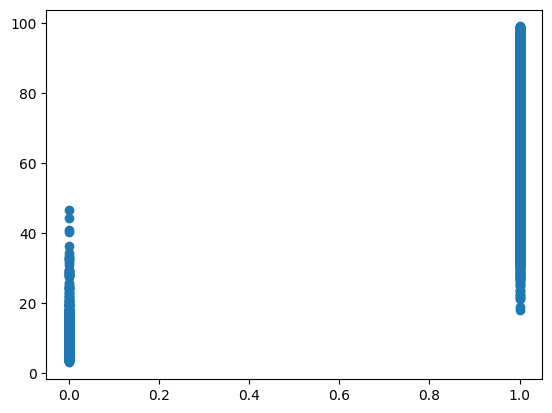

In [38]:
plt.scatter(df['isillust'], df['mode_rate'])

In [39]:
df1['numpixel'].describe()

count      1925.000000
mean     179952.139221
std       18326.720891
min       48500.000000
25%      167000.000000
50%      187500.000000
75%      187500.000000
max      250000.000000
Name: numpixel, dtype: float64

In [40]:
df2['numpixel'].describe()

count    2.357800e+04
mean     3.041267e+06
std      3.764987e+06
min      5.994000e+04
25%      4.900000e+05
50%      4.900000e+05
75%      8.699840e+06
max      2.500500e+07
Name: numpixel, dtype: float64

/tmp/ipykernel_36046/3308479577.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])
/tmp/ipykernel_36046/3308479577.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[attr])


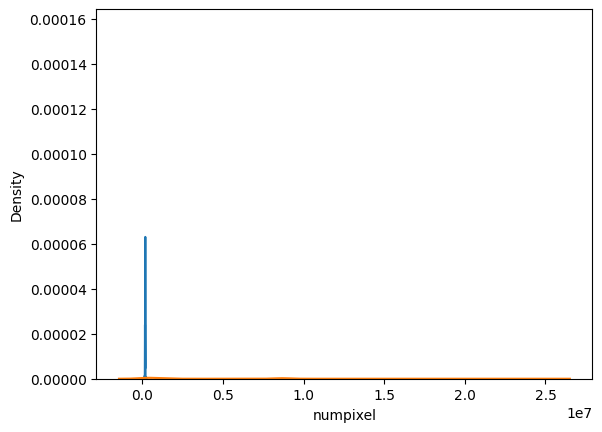

In [41]:
attr = 'numpixel'

sns.distplot(df1[attr])
sns.distplot(df2[attr])
plt.show()

In [42]:
tempdf = df
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25503 entries, 0 to 25502
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   img         25503 non-null  string        
 1   label       25503 non-null  string        
 2   ftype       25503 non-null  string        
 3   cmap        25503 non-null  string        
 4   fsize       25503 non-null  float64       
 5   fmtime      25503 non-null  datetime64[ns]
 6   width       25503 non-null  int64         
 7   height      25503 non-null  int64         
 8   channel     25503 non-null  int64         
 9   subclass    25503 non-null  string        
 10  mode_rate   25503 non-null  float64       
 11  numcluster  25503 non-null  int64         
 12  avgcolor    16 non-null     string        
 13  modecolors  16 non-null     string        
 14  modehists   16 non-null     string        
 15  isillust    25503 non-null  int64         
 16  numpixel    25503 non-

In [43]:
del tempdf['img']
del tempdf['label']
del tempdf['fmtime']
del tempdf['subclass']
del tempdf['numcluster']
del tempdf['avgcolor']
del tempdf['modecolors']
del tempdf['modehists']

In [44]:
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25503 entries, 0 to 25502
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ftype      25503 non-null  string 
 1   cmap       25503 non-null  string 
 2   fsize      25503 non-null  float64
 3   width      25503 non-null  int64  
 4   height     25503 non-null  int64  
 5   channel    25503 non-null  int64  
 6   mode_rate  25503 non-null  float64
 7   isillust   25503 non-null  int64  
 8   numpixel   25503 non-null  int64  
dtypes: float64(2), int64(5), string(2)
memory usage: 3.0 MB


In [45]:
tempdf['channel'].value_counts()

3    24318
4     1169
1       16
Name: channel, dtype: int64

In [46]:
ftypelist = {'jpg':0, 'png':1}
cmaplist = {'RGB':0, 'RGBA':1, 'CMYK':2, 'P':3, 'L':4}


for i, row in tempdf.iterrows():
    if tempdf.loc[i, 'ftype'] in ['0', '1']:
        continue
    tempdf.loc[i, 'ftype'] = str(ftypelist[tempdf.loc[i, 'ftype']])
    tempdf.loc[i, 'cmap'] = str(cmaplist[tempdf.loc[i, 'cmap']])
    
tempdf = tempdf.astype({'ftype':'int', 'cmap':'int'})

In [47]:
labeldf = tempdf['isillust']
del tempdf['isillust']

In [48]:
X = tempdf
y = labeldf

In [49]:
display(X.head(3))

,ftype,cmap,fsize,width,height,channel,mode_rate,numpixel
0,0,0,24.222656,300,300,3,60.3325,90000
1,0,0,55.888672,1200,1200,3,89.5125,1440000
2,0,0,129.636719,700,700,3,73.7850,490000


In [66]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, accuracy_score

In [78]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [79]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [80]:
accuracy_history = []

X = np.array(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
    
    model = xgb.XGBClassifier(booster='gbtree', 
            colsample_bylevel=0.9, 
            colsample_bytree=0.8, 
            gamma=0, 
            max_depth=15, 
            min_child_weight=10, 
            n_estimators=100, 
            nthread=5, 
            objective='binary:logistic', 
            random_state=42, 
            silent= True)
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    y_predict = model.predict(X_test)
    print("R2 :", model.score(X_train, y_train))
    print("Precision :", precision_score(y_test, y_predict))
    print("Recall :", recall_score(y_test, y_predict))
    print("F1 :", f1_score(y_test, y_predict))
    accuracy_history.append(accuracy_score(y_predict, y_test))
    
print("accuracy of each K :", accuracy_history)
print("average acc :", np.mean(accuracy_history))

[23:35:57] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.43821
[1]	validation_0-logloss:0.29691
[2]	validation_0-logloss:0.20791
[3]	validation_0-logloss:0.14848
[4]	validation_0-logloss:0.10724
[5]	validation_0-logloss:0.07815
[6]	validation_0-logloss:0.05733
[7]	validation_0-logloss:0.04227
[8]	validation_0-logloss:0.03132
[9]	validation_0-logloss:0.02312
[10]	validation_0-logloss:0.01725
[11]	validation_0-logloss:0.01277
[12]	validation_0-logloss:0.00959
[13]	validation_0-logloss:0.00725
[14]	validation_0-logloss:0.00541
[15]	validation_0-logloss:0.00423
[16]	validation_0-logloss:0.00336
[17]	validation_0-logloss:0.00257
[18]	validation_0-logloss:0.00209
[19]	va

[7]	validation_0-logloss:0.04419
[8]	validation_0-logloss:0.03346
[9]	validation_0-logloss:0.02486
[10]	validation_0-logloss:0.01914
[11]	validation_0-logloss:0.01435
[12]	validation_0-logloss:0.01122
[13]	validation_0-logloss:0.00896
[14]	validation_0-logloss:0.00681
[15]	validation_0-logloss:0.00567
[16]	validation_0-logloss:0.00475
[17]	validation_0-logloss:0.00371
[18]	validation_0-logloss:0.00319
[19]	validation_0-logloss:0.00281
[20]	validation_0-logloss:0.00252
[21]	validation_0-logloss:0.00228
[22]	validation_0-logloss:0.00210
[23]	validation_0-logloss:0.00195
[24]	validation_0-logloss:0.00190
[25]	validation_0-logloss:0.00190
[26]	validation_0-logloss:0.00190
[27]	validation_0-logloss:0.00191
[28]	validation_0-logloss:0.00191
[29]	validation_0-logloss:0.00192
[30]	validation_0-logloss:0.00192
[31]	validation_0-logloss:0.00192
[32]	validation_0-logloss:0.00192
[33]	validation_0-logloss:0.00192
[34]	validation_0-logloss:0.00192
[35]	validation_0-logloss:0.00193
[36]	validation_0

[24]	validation_0-logloss:0.00117
[25]	validation_0-logloss:0.00115
[26]	validation_0-logloss:0.00113
[27]	validation_0-logloss:0.00112
[28]	validation_0-logloss:0.00111
[29]	validation_0-logloss:0.00111
[30]	validation_0-logloss:0.00111
[31]	validation_0-logloss:0.00110
[32]	validation_0-logloss:0.00110
[33]	validation_0-logloss:0.00110
[34]	validation_0-logloss:0.00110
[35]	validation_0-logloss:0.00110
[36]	validation_0-logloss:0.00110
[37]	validation_0-logloss:0.00110
[38]	validation_0-logloss:0.00110
[39]	validation_0-logloss:0.00110
[40]	validation_0-logloss:0.00110
[41]	validation_0-logloss:0.00110
[42]	validation_0-logloss:0.00110
[43]	validation_0-logloss:0.00110
[44]	validation_0-logloss:0.00110
[45]	validation_0-logloss:0.00110
[46]	validation_0-logloss:0.00110
[47]	validation_0-logloss:0.00110
[48]	validation_0-logloss:0.00110
[49]	validation_0-logloss:0.00110
[50]	validation_0-logloss:0.00110
[51]	validation_0-logloss:0.00110
[52]	validation_0-logloss:0.00110
[53]	validatio

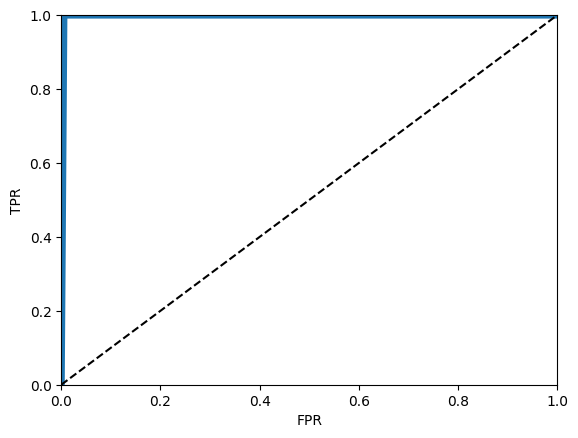

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=5, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
plot_roc_curve(fpr, tpr)
plt.show()